# Scatter plot similarities

In [ ]:
using Plots
using Random
using StatsBase
using LinearAlgebra
using Printf
using Revise

In [ ]:
# local pacakges
using PolygonAlgorithms: matrix_to_points
using PolygonAlgorithms: convex_hull, intersect_convex, area_polygon
using PolygonAlgorithms: x_coords, y_coords, point_in_polygon

In [ ]:
# Ellipse
Revise.includet("ellipses/src/ellipse.jl")
Revise.includet("ellipses/src/eigenvalues.jl")
# Other similarites
Revise.includet("wasserstein.jl")
Revise.includet("similarity_metrics.jl")
# Bivariate normal
include("bivariate.jl")

correlated_bivariate_normal (generic function with 2 methods)

## Generate data

https://www.probabilitycourse.com/chapter5/5_3_2_bivariate_normal_dist.php

The following are correlated with $r$:

$$
X = \mu_X + \sigma_X Z_1 \\
Y = \mu_Y + \sigma_Y \left(r Z_1 + \sqrt{1-r^2}Z_2 \right)
$$

In [ ]:
μ1, σ1, r1, n1 = (0.0, 0.0), (1.5, 2.0), 0.7, 250
μ2, σ2, r2, n2 = (4.0, 0.5), (1.0, 1.6), -0.2, 300

x1, y1 = correlated_bivariate_normal(μ1, σ1, r1, n1);
x2, y2 = correlated_bivariate_normal(μ2, σ2, r2, n2);

println(cor(x1, y1))
println(cor(x2, y2))

0.6942770915150482
-0.1492591634472077


In [ ]:
## outliers
# μ1, σ1, r1, n1 = (0.0, 0.0), (1.0, 1.0), 0.0, 50
# μ2, σ2, r2, n2 = (4.0, 0.0), (1.0, 1.0), 0.0, 30

# x1, y1 = correlated_bivariate_normal(μ1, σ1, r1, n1);
# x2, y2 = correlated_bivariate_normal(μ2, σ2, r2, n2);

# push!(x1, 7.0);
# push!(y1, 0.5);

In [ ]:
## similar
# μ1, σ1, r1, n1 = (0.0, 0.0), (1.0, 1.0), 0.0, 50
# μ2, σ2, r2, n2 = (0.0, 0.0), (0.2, 3.0), 0.0, 50
# μ3, σ3, r3, n3 = (6.0, 0.0), (1.0, 1.0), 0.0, 50

# x1, y1 = correlated_bivariate_normal(μ1, σ1, r1, n1);
# x2, y2 = correlated_bivariate_normal(μ2, σ2, r2, n2);
# x3, y3 = correlated_bivariate_normal(μ3, σ3, r3, n3);

## Plot

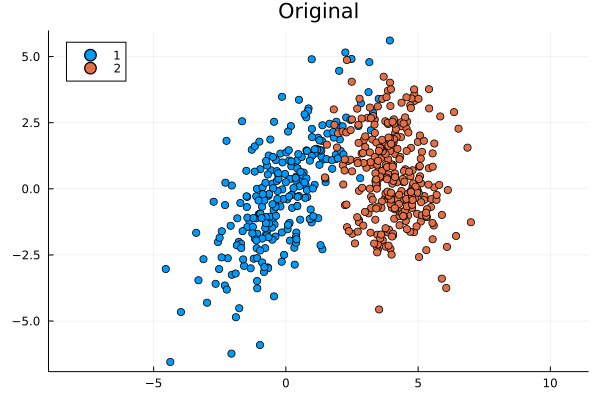

In [ ]:
double_plot = scatter(x1, y1, aspect=:equal, label="1", aspectratio=:equal)
scatter!(double_plot, x2, y2, label="2")
#scatter!(double_plot, x3, y3, label="3")
plot!(double_plot, title="Original")

In [ ]:
points1 = permutedims(hcat(x1, y1));
points2 = permutedims(hcat(x2, y2));

## Polygon

In [ ]:
points1_vec = matrix_to_points(points1);
points2_vec = matrix_to_points(points2);

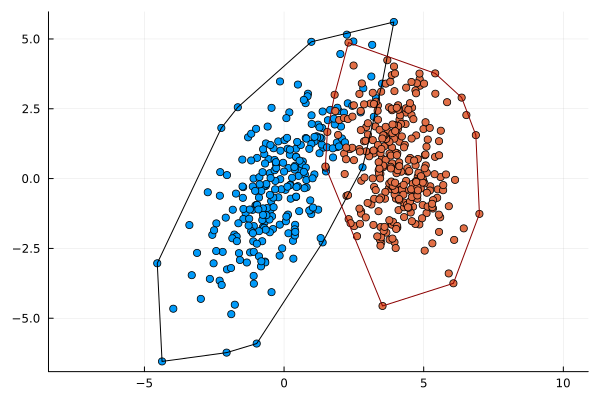

In [ ]:
hull_idxs1 = convex_hull(points1_vec);
hull1 = points1_vec[hull_idxs1]

hull_idxs2 = convex_hull(points2_vec);
hull2 = points2_vec[hull_idxs2]

plot_polyon = scatter(
    x_coords(points1_vec), y_coords(points1_vec), aspect=:equal, label="", aspectratio=:equal)
scatter!(x_coords(points2_vec), y_coords(points2_vec), label="")

idxs1 = vcat(hull_idxs1, hull_idxs1[1])
plot!(plot_polyon, x_coords(points1_vec[idxs1]), y_coords(points1_vec[idxs1]), label="", color=:black)

idxs2 = vcat(hull_idxs2, hull_idxs2[1])
plot!(plot_polyon, x_coords(points2_vec[idxs2]), y_coords(points2_vec[idxs2]), label="", color=:darkred)

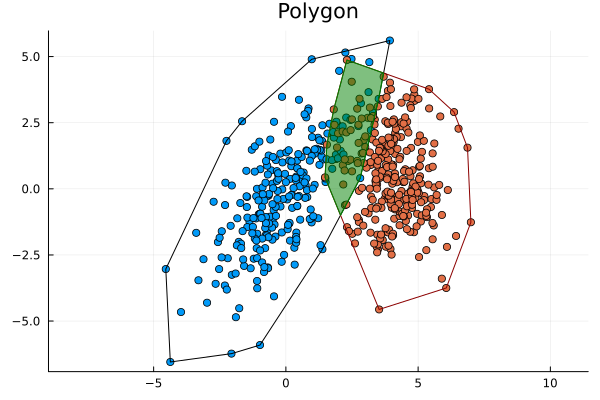

In [ ]:
intersection = intersect_convex(hull1, hull2);

if !isempty(intersection)
    idxs = vcat(1:length(intersection), 1)
    plot!(plot_polyon, x_coords(intersection[idxs]), y_coords(intersection[idxs]), 
        fill=(true, 0.5), label="", color=:green)
end

plot!(plot_polyon, title="Polygon")

In [ ]:
area_1 = area_polygon(hull1)
area_2 = area_polygon(hull2)
area_inter = area_polygon(intersection)
area_inter / (area_1 + area_2 - area_inter)

0.08670035409304581

In [ ]:
@time similarities_polygons(points1_vec, points2_vec)

  0.000056 seconds (11 allocations: 1.609 KiB)


0.08670035409304581

## Ellipses

In [ ]:
C1 = cov(points1, dims=2);
C2 = cov(points2, dims=2);

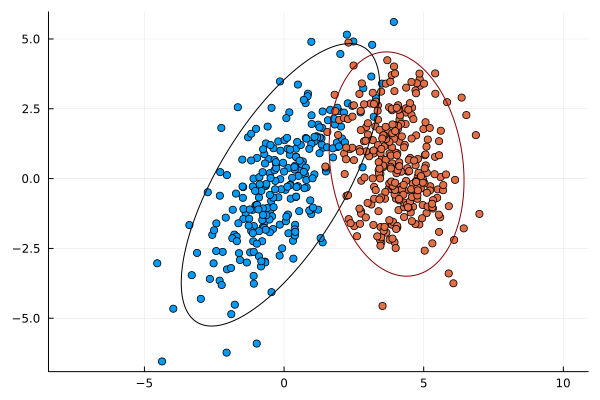

In [ ]:
scale = 2.45
λ1s, W1 = calc_eigvals_2x2(C1)
λ2s, W2 = calc_eigvals_2x2(C2)

a1 = scale * sqrt(λ1s[1])
b1 = scale * sqrt(λ1s[2])
angle1 = atan(W1[2, 1], W1[1, 1])
origin1 = vec(mean(points1, dims=2))
X1 = make_ellipse(a1, b1, angle1, origin1)

a2 = scale * sqrt(λ2s[1])
b2 = scale * sqrt(λ2s[2])
angle2 = atan(W2[2, 1], W2[1, 1])
origin2 = vec(mean(points2, dims=2))
X2 = make_ellipse(a2, b2, angle2, origin2)

plot_ellipse = scatter(points1[1, :], points1[2, :], aspect=:equal, label="", aspectratio=:equal)
scatter!(plot_ellipse, points2[1, :], points2[2, :], label="")
plot!(plot_ellipse, X1[1, :], X1[2, :], label="", color=:black)
plot!(plot_ellipse, X2[1, :], X2[2, :], label="", color=:darkred)

In [ ]:
function order_points_clockwise(points::Matrix)
    centroid = sum(points, dims=2) / size(points, 2)
    angles = atan.(points[2, :] .- centroid[2], points[1, :] .- centroid[1])
    idxs = sortperm(angles)
    points[:, idxs]
end

order_points_clockwise (generic function with 1 method)

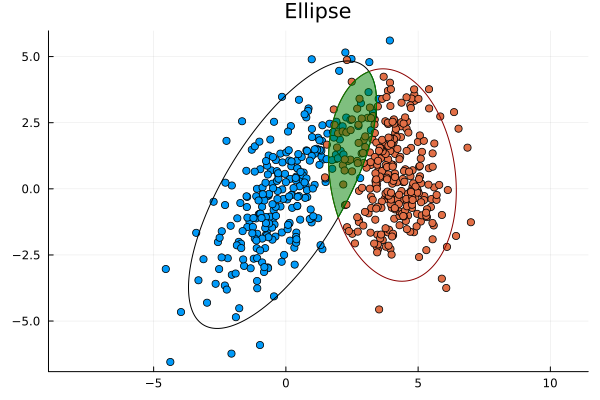

In [ ]:
intersection_points, multiplicity = intersect_ellipses(a1, b1, angle1, origin1, a2, b2, angle2, origin2)

idxs_1in2 = point_in_ellipse(X1, a2, b2, angle2, origin2)
idxs_2in1 = point_in_ellipse(X2, a1, b1, angle1, origin1)

intersection = order_points_clockwise(
    hcat(X1[:, idxs_1in2], X2[:, idxs_2in1], intersection_points)
    );

if !isempty(intersection)
    idxs = vcat(1:size(intersection, 2), 1)
    plot!(plot_ellipse, intersection[1, idxs], intersection[2, idxs], 
        fill=(true, 0.5), label="", color=:green)

end

plot!(plot_ellipse, title="Ellipse")

In [ ]:
area_1 = π * a1 * b1
area_inter = area_polygon(matrix_to_points(intersection))
area_inter / area_1

0.1490894706396064

In [ ]:
@time similarities_ellipses(points1, points2)

  1.231849 seconds (1.89 M allocations: 92.841 MiB, 7.66% gc time, 99.99% compilation time)


0.09364806586648004

## Hungarian

In [ ]:
using Hungarian

In [ ]:
function make_distance_matrix(points1::AbstractMatrix, points2::AbstractMatrix)
    distance_matrix = Matrix{Float64}(undef, size(points1, 2), size(points2, 2))
    for i in 1:size(points1, 2)
        for j in 1:size(points2, 2)
            diff = points1[:, i] - points2[:, j]
            distance_matrix[i, j] = sum(diff .* diff)
        end
    end
    distance_matrix
end

function make_distance_matrix_vectorised(points1::AbstractMatrix, points2::AbstractMatrix)
    square1 = transpose(sum(points1 .* points1, dims=1))
    square2 = sum(points2 .* points2, dims=1)
    distance_matrix = square1 .- 2 * transpose(points1) * points2 .+ square2
    distance_matrix
end

make_distance_matrix_vectorised (generic function with 1 method)

In [ ]:
@time D1 = make_distance_matrix(points1, points2)
@time D2 = make_distance_matrix_vectorised(points1, points2);
sum(abs.(D1 - D2))

  0.103577 seconds (341.23 k allocations: 25.453 MiB, 74.03% compilation time)
  1.706834 seconds (3.53 M allocations: 170.173 MiB, 3.89% gc time, 99.93% compilation time)


1.9686695112638986e-10

In [ ]:
@time assignments, cost = hungarian(D1)
println(cost)

  1.570143 seconds (1.33 M allocations: 66.557 MiB, 1.41% gc time, 71.07% compilation time)
4252.355791988074


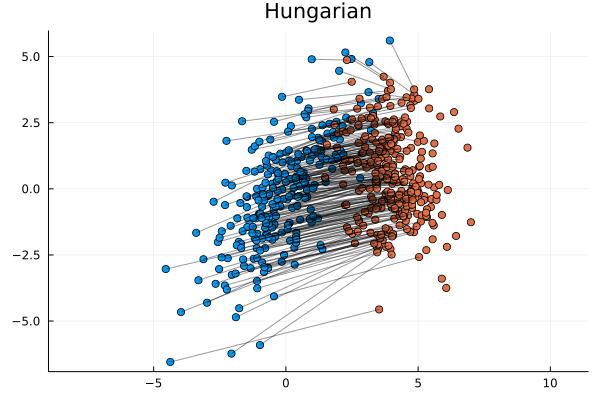

In [ ]:
plot_hungarian = scatter(points1[1, :], points1[2, :], aspect=:equal, label="", aspectratio=:equal)
scatter!(plot_hungarian, points2[1, :], points2[2, :], label="")

for (i, j) in enumerate(assignments)
    if j == 0 
        continue
    end
    plot!(plot_hungarian, [points1[1, i], points2[1, j]], [points1[2, i], points2[2, j]], color=:black, alpha=0.4, label="")
end
plot!(plot_hungarian, title="Hungarian")
plot_hungarian

In [ ]:
@time similarities_hungarian(points1, points2)

  0.953088 seconds (4.61 k allocations: 1.451 MiB, 1.38% compilation time)


17.0094231679523

## Wasserstein

In [ ]:
@time gaussian_wasserstein_metric(points1, points2)

 30.883242 seconds (35.14 M allocations: 1.494 GiB, 4.42% gc time, 99.97% compilation time)


19.043818439760358

## Results

In [ ]:
stats_ellipse = @timed similarities_ellipses(points1, points2);
stats_wasserstein = @timed gaussian_wasserstein_metric(points1, points2);
v1, v2 = matrix_to_points(points1), matrix_to_points(points2)
stats_poly = @timed similarities_polygons(v1, v2);
stats_hungarian = @timed similarities_hungarian(points1, points2);

In [ ]:
@printf("Hungarian time: %9.3f\n", stats_hungarian.time/stats_wasserstein.time)
@printf("Polygon time:   %9.3f\n", stats_poly.time/stats_wasserstein.time)
@printf("Ellipse time:   %9.3f\n", stats_ellipse.time/stats_wasserstein.time)
@printf("Wasserstien time: %.6fs", stats_wasserstein.time)

Hungarian time: 12557.336
Polygon time:       3.015
Ellipse time:      25.158
Wasserstien time: 0.000098s

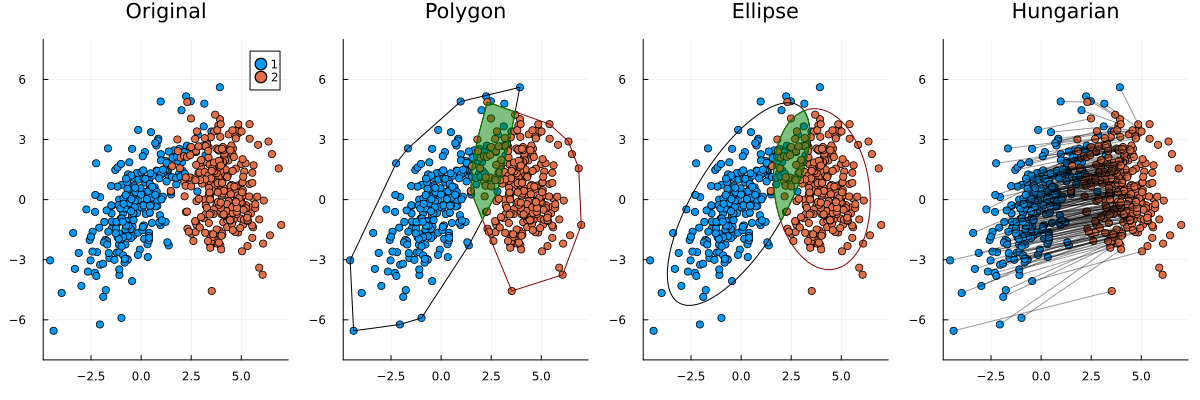

In [ ]:
plot(double_plot, plot_polyon, plot_ellipse, plot_hungarian, layout=(1, 4), size=(1200, 400), link=:all, ylims=(-8, 8))